# Portfolio Simulations and Analysis

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import datetime as dt

root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_dir)

from data.fetch_data  import download_stock_prices
from portfolio.strategies import build_portfolio_free_float, build_portfolio_equal_weight, build_portfolio_inv_free_float

## 1. Get the data from yahoo finance


In [2]:
## Define FAANG tickers and time window
tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOGL"]
start_date = "2024-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")


In [3]:
prices = download_stock_prices(
            tickers,
            start_date,
            end_date)

## 2. Method used to Calculate Weights and Portfolio Value

- For each stock in the portfolio, we first determine its **free float**, which represents the number of shares available for public trading (excluding insider holdings, restricted shares, and other non-tradable shares).  
- Next, we calculate the **total free float** across all stocks in the portfolio:  
  $$
  \text{Total Free Float} = \sum_i \text{Free Float}_i
  $$  
- The **weight of each stock** is then computed as its proportion of the total free float:  
  $$
  \text{Weight}_i = \frac{\text{Free Float Shares}_i}{\text{Total Free Float Shares}}
  $$ 

This approach ensures that stocks with **larger free floats**—i.e., more liquid and widely traded—have a **proportionally greater impact** on the portfolio’s performance.


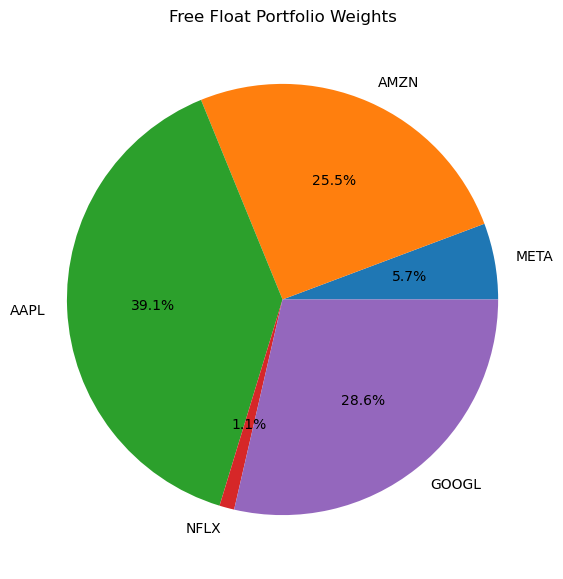

In [4]:
initial_capital = 1000
df_port_ff, df_weight_ff = build_portfolio_free_float(
                            tickers,
                            start_date,
                            end_date,
                            initial_capital)

weights = df_weight_ff.set_index("Ticker")["Free Float Weight"].dropna()

plt.figure(figsize=(7,7))
plt.pie(weights, labels=weights.index, autopct="%1.1f%%")
plt.title("Free Float Portfolio Weights")
plt.show()


## 3. Calculating Portfolio Value

For each day, we first calculate the **daily return** of each stock:

$$
r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}}
$$

where \(P_{i,t}\) is the closing price of stock \(i\) at time \(t\).

The **portfolio return** on day \(t\) is the weighted sum of individual stock returns:

$$
R_t = \sum_i w_i \cdot r_{i,t}
$$

Starting from an initial capital, the **cumulative portfolio value** is calculated as:

$$
V_t = V_{t-1} \times (1 + R_t)
$$


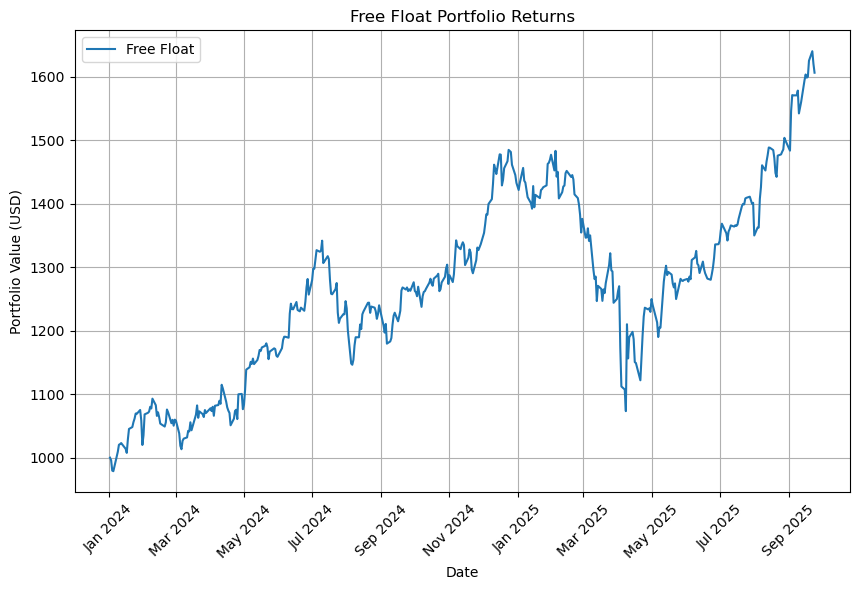

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df_port_ff.index, df_port_ff["Portfolio Value"], label = "Free Float")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b %Y"))
ax.set_xlabel("Date")
ax.set_ylabel("Portfolio Value (USD)")
ax.set_title('Free Float Portfolio Returns')
ax.legend()
ax.grid()
ax.tick_params(axis="x", labelrotation=45)

plt.show()

In [6]:
df_port_ew, df_weight_ew = build_portfolio_equal_weight(
                            tickers,
                            start_date,
                            end_date,
                            initial_capital)

In [8]:
df_port_iff, df_weight_iff = build_portfolio_inv_free_float(
                            tickers,
                            start_date,
                            end_date,
                            initial_capital)

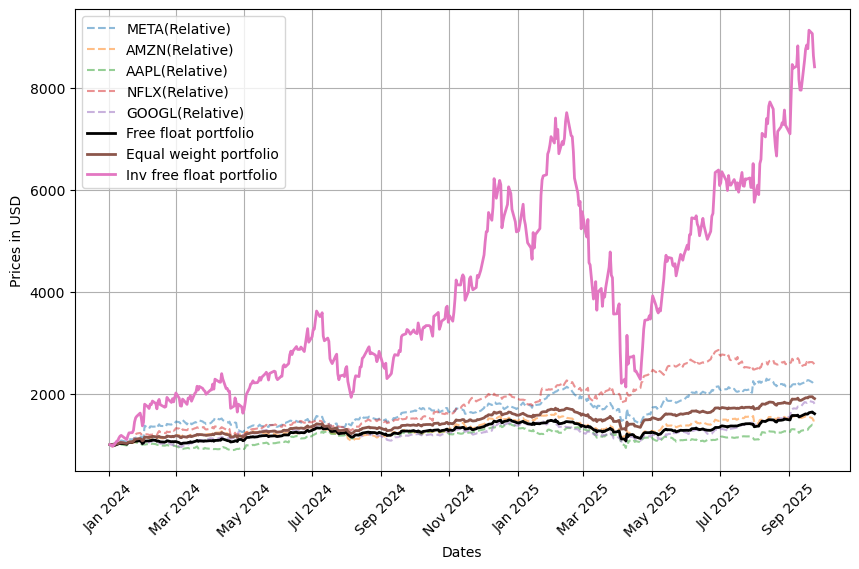

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

relative_prices = (prices/prices.iloc[0])*initial_capital

for col in prices.columns:
    ax.plot(relative_prices.index, relative_prices[col], "--", alpha=0.5, label=col+'(Relative)')

ax.plot(df_port_ff.index, df_port_ff["Portfolio Value"], '-k', label = "Free float portfolio", lw=2)

ax.plot(df_port_ew.index, df_port_ew["Portfolio Value"], label = "Equal weight portfolio", lw=2)

ax.plot(df_port_iff.index, df_port_iff["Portfolio Value"], label = "Inv free float portfolio", lw=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xlabel("Dates")
ax.set_ylabel("Prices in USD")
ax.grid()
ax.legend()
ax.tick_params(axis='x', labelrotation=45)